In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import sidetable

In [3]:
df = pd.read_csv('Placement_Data_Full_Class.csv',index_col='sl_no')
df.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
sl_no                                                                         
1          M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
2          M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
3          M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
4          M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
5          M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

      workex  etest_p specialisation  mba_p      status    salary  
sl_no                                                              
1         No     55.0         Mkt&HR  58.80      Placed  270000.0  
2        Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
3         No     75.0        Mkt&Fin  57.80      Placed  250000.0  
4         No     66.0         Mkt&HR  59.43  Not Placed       NaN  
5         No     96.8        Mkt&Fin  55.50      Placed  425000.0

### Bivariate Analysis
    categorical vs categorical --> crosstab
    categorical vs numerical --> bar graphs
    numerical vs numerical --> corelation graphs

### specialisation vs status

In [5]:
pd.crosstab(df['specialisation'], df['status'], normalize='columns')

status          Not Placed    Placed
specialisation                      
Mkt&Fin           0.373134  0.641892
Mkt&HR            0.626866  0.358108

In [9]:
for col in df.select_dtypes(include='object'):
    print(pd.crosstab(df[col], df['status'], normalize='columns'))
    print("-------------------------------------------------------")
    

status  Not Placed    Placed
gender                      
F          0.41791  0.324324
M          0.58209  0.675676
-------------------------------------------------------
status   Not Placed    Placed
ssc_b                        
Central    0.567164  0.527027
Others     0.432836  0.472973
-------------------------------------------------------
status   Not Placed    Placed
hsc_b                        
Central    0.402985  0.385135
Others     0.597015  0.614865
-------------------------------------------------------
status    Not Placed    Placed
hsc_s                         
Arts        0.074627  0.040541
Commerce    0.507463  0.533784
Science     0.417910  0.425676
-------------------------------------------------------
status     Not Placed    Placed
degree_t                       
Comm&Mgmt    0.641791  0.689189
Others       0.089552  0.033784
Sci&Tech     0.268657  0.277027
-------------------------------------------------------
status  Not Placed    Placed
workex              

In [10]:
df.corr()

ssc_p     hsc_p  degree_p   etest_p     mba_p    salary
ssc_p     1.000000  0.511472  0.538404  0.261993  0.388478  0.035330
hsc_p     0.511472  1.000000  0.434206  0.245113  0.354823  0.076819
degree_p  0.538404  0.434206  1.000000  0.224470  0.402364 -0.019272
etest_p   0.261993  0.245113  0.224470  1.000000  0.218055  0.178307
mba_p     0.388478  0.354823  0.402364  0.218055  1.000000  0.175013
salary    0.035330  0.076819 -0.019272  0.178307  0.175013  1.000000

<AxesSubplot:>

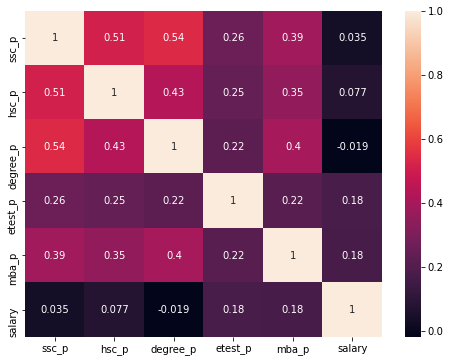

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

### categorical vs numerical

In [14]:
df.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
sl_no                                                                         
1          M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
2          M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
3          M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
4          M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
5          M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

      workex  etest_p specialisation  mba_p      status    salary  
sl_no                                                              
1         No     55.0         Mkt&HR  58.80      Placed  270000.0  
2        Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
3         No     75.0        Mkt&Fin  57.80      Placed  250000.0  
4         No     66.0         Mkt&HR  59.43  Not Placed       NaN  
5         No     96.8        Mkt&Fin  55.50      Placed  425000.0

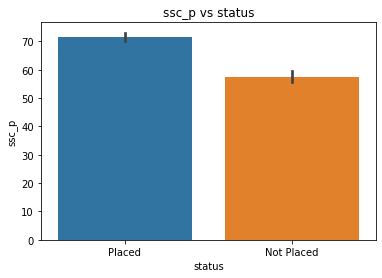

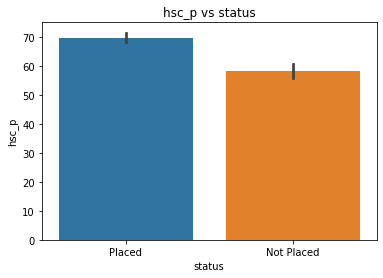

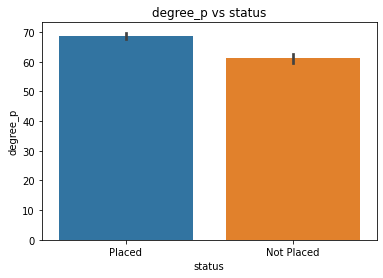

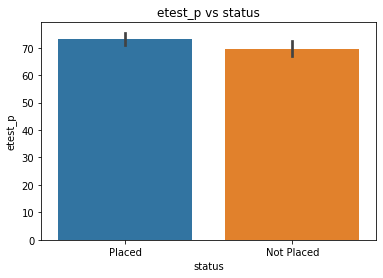

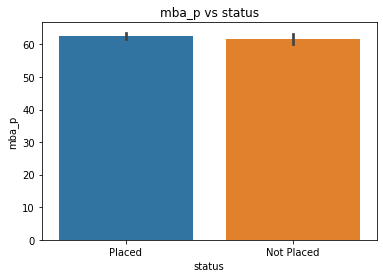

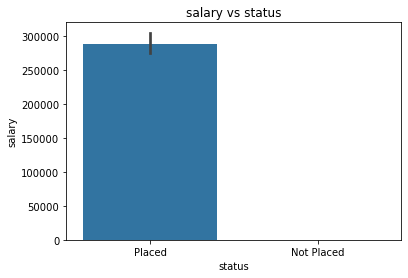

In [24]:
for col in df.select_dtypes(exclude='object').columns:
    sns.barplot('status',col,data=df)
    plt.title(f"{col} vs status")
    plt.show()

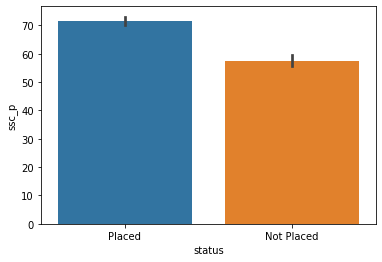

In [17]:
sns.barplot('status','ssc_p',data=df)
plt.show()

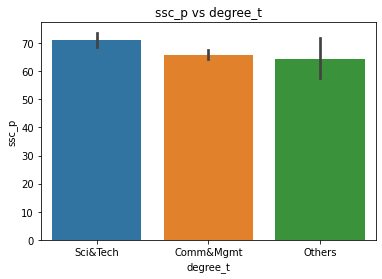

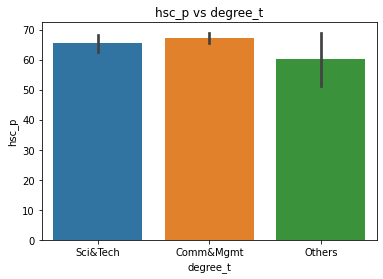

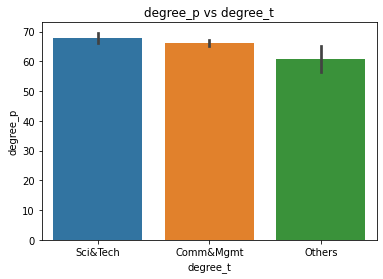

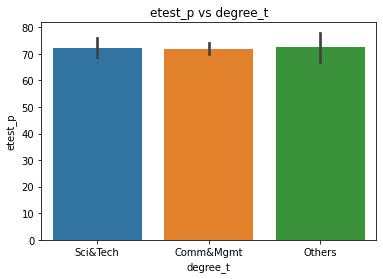

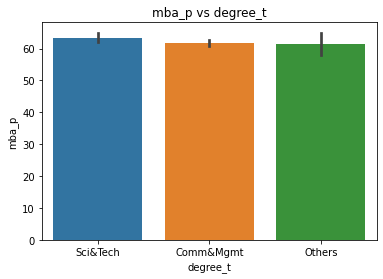

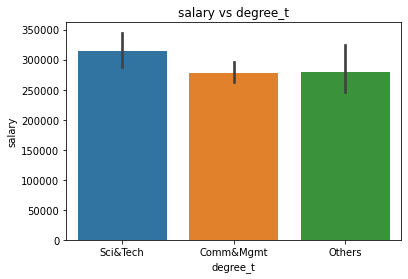

In [26]:
for col in df.select_dtypes(exclude='object').columns:
    sns.barplot('degree_t',col,data=df)
    plt.title(f"{col} vs degree_t")
    plt.show()

### numerical vs numerical

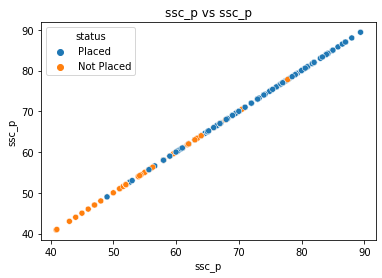

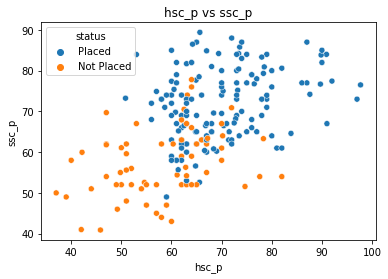

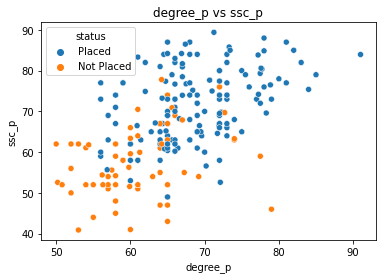

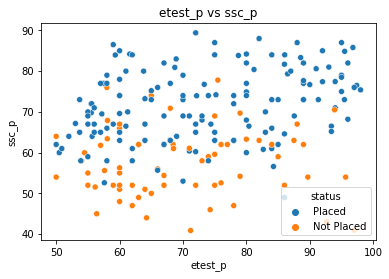

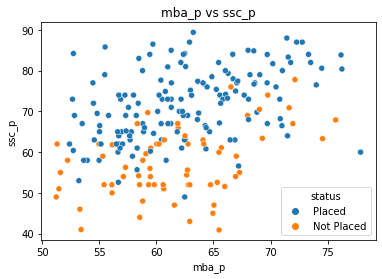

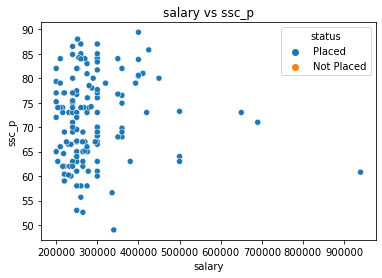

In [34]:
y = 'ssc_p'
for col in df.select_dtypes(exclude='object').columns:
    sns.scatterplot(col,y,data=df, hue='status')
    plt.title(f"{col} vs "+y)
    plt.show()

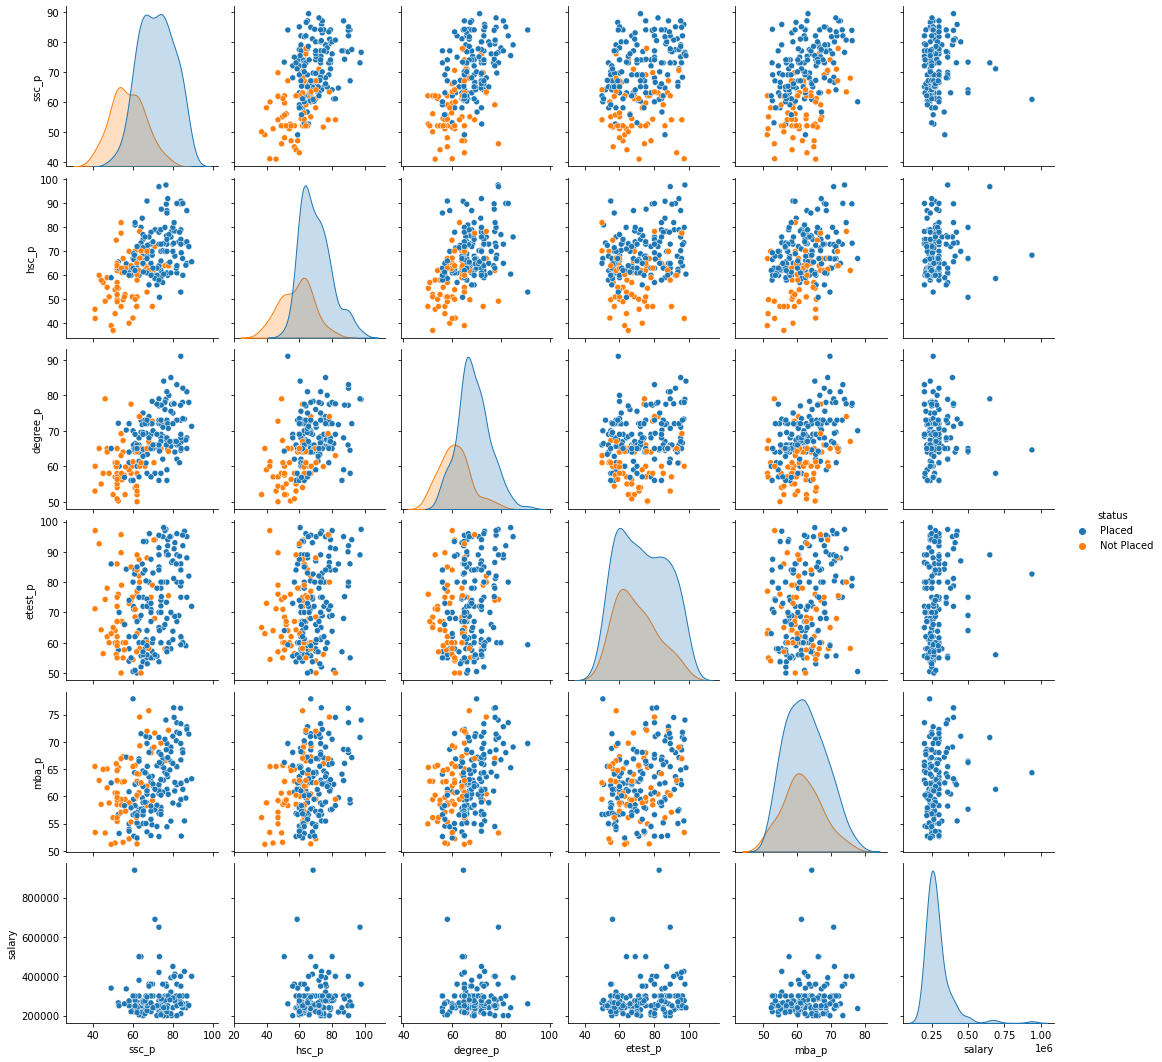

In [37]:
sns.pairplot(df, hue='status')
plt.show()

In [38]:
from pandas_profiling import ProfileReport

In [39]:
design_report = ProfileReport(df)
design_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]